# Loan Default Prediction

#### Sources:
- https://www.kaggle.com/kmldas/loan-default-prediction
- https://www.kaggle.com/kmldas/beginner-s-guide-to-eda-financial-analytics

___

## EDA

### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read in and examine data

In [3]:
data = pd.read_csv('Default_Fin.csv')

In [4]:
print(data.head())

   Index  Employed  Bank Balance  Annual Salary  Defaulted?
0      1         1       8754.36      532339.56           0
1      2         0       9806.16      145273.56           0
2      3         1      12882.60      381205.68           0
3      4         1       6351.00      428453.88           0
4      5         1       9427.92      461562.00           0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [6]:
data.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [7]:
data.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


#### Summary statistics observations:
- ~70% of loan customers are employed
- ~3% of customers defaulted on loans (low)
- very high annual salary (average of $402k)

### Feature Engineering
- we don't have any info on loan amounts, durations, interest rates, etc.
- basic assumption: customers with a higher salary and bank balance will have more resources to avoid default
- savings rate -- proportion of bank balance to annual salary
- reserve capacity -- my attempt to define the ability to finance a loan with both income and existing bank balance

In [8]:
# savings rate
data['Savings Rate'] = data['Bank Balance'] / data['Annual Salary']

# reserve capacity
data['Reserve Capacity'] = (data['Employed'] * np.sqrt(data['Savings Rate'])
                            * data['Annual Salary']) + (data['Bank Balance'] * 0.5)

### Visualizations

Text(0.5, 1.0, 'Reserve Capacity')

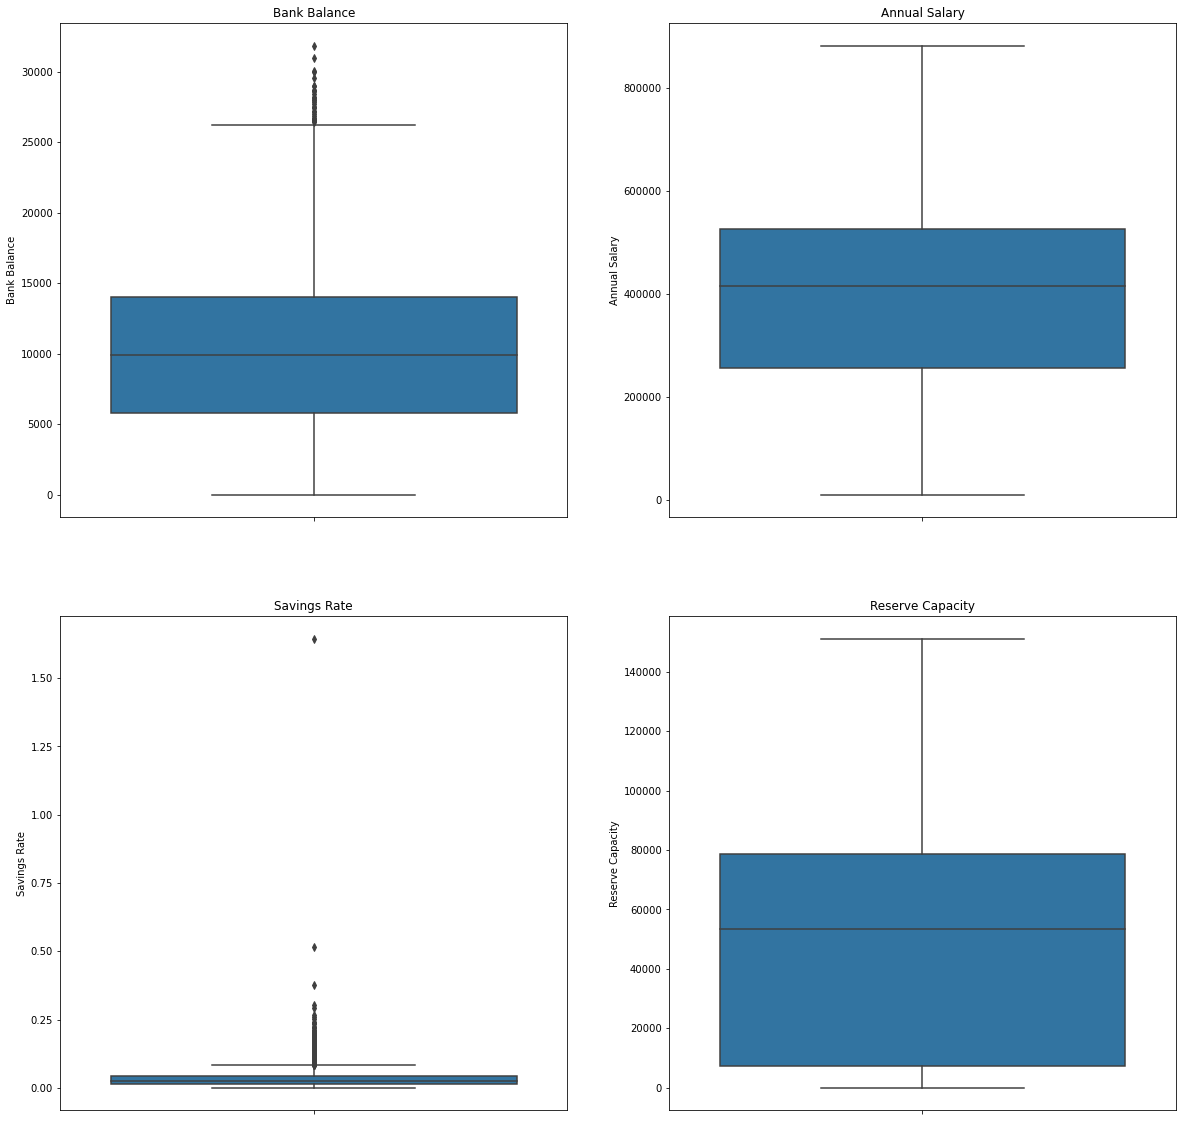

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Bank Balance
sns.boxplot(ax=axs[0, 0], y=data['Bank Balance'])
axs[0, 0].set_title('Bank Balance')

# Annual Salary
sns.boxplot(ax=axs[0, 1], y=data['Annual Salary'])
axs[0, 1].set_title('Annual Salary')

# Savings Rate
sns.boxplot(ax=axs[1, 0], y=data['Savings Rate'])
axs[1, 0].set_title('Savings Rate')

# Reserve Capacity
sns.boxplot(ax=axs[1, 1], y=data['Reserve Capacity'])
axs[1, 1].set_title('Reserve Capacity')

Text(0.5, 1.0, 'Reserve Capacity')

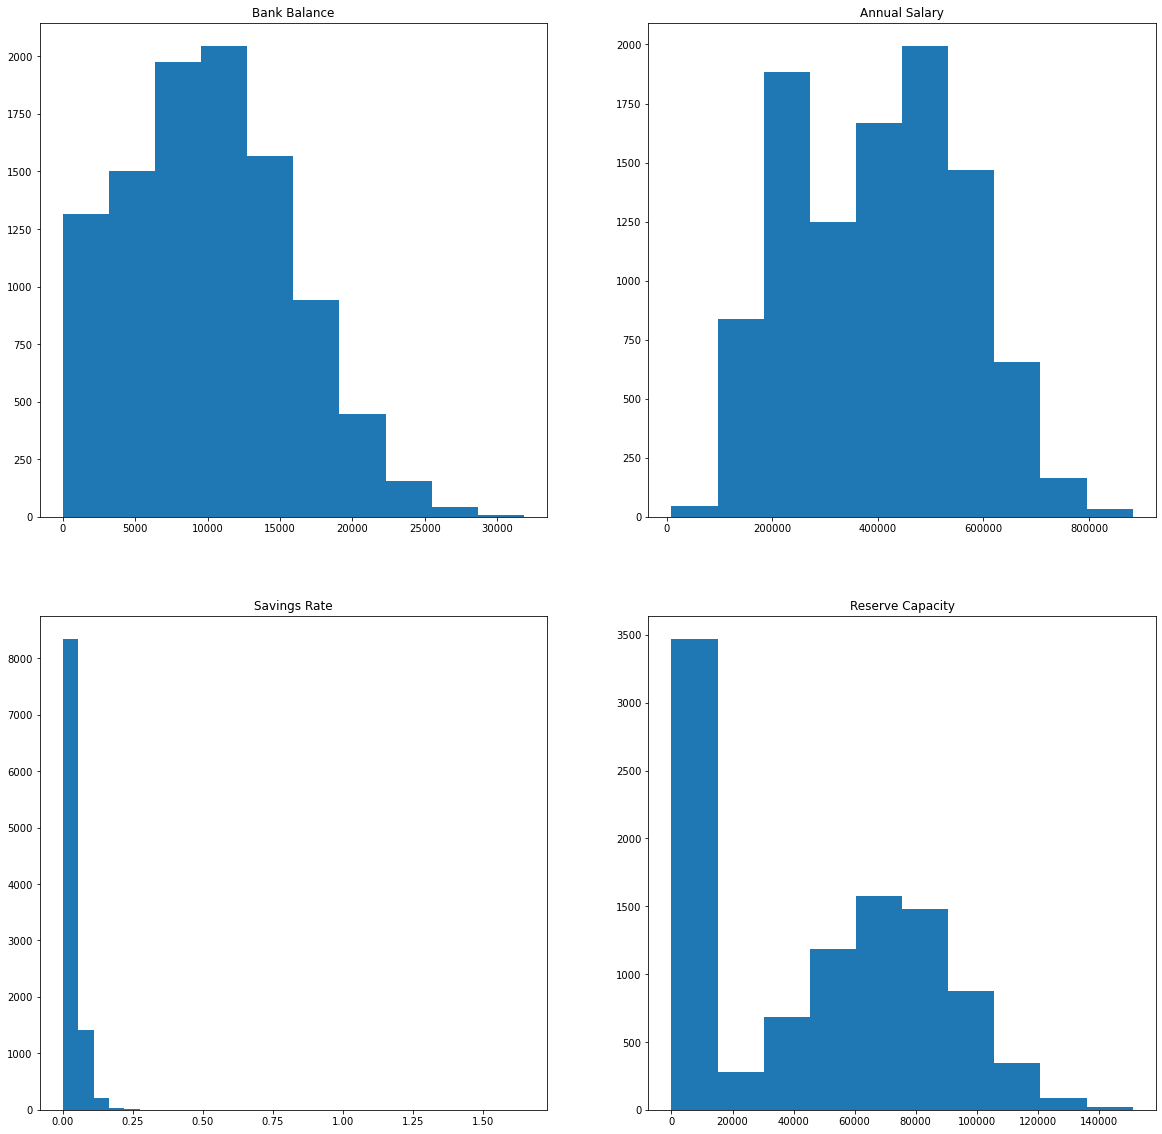

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Bank Balance
axs[0, 0].hist(data['Bank Balance'])
axs[0, 0].set_title('Bank Balance')

# Annual Salary
axs[0, 1].hist(data['Annual Salary'])
axs[0, 1].set_title('Annual Salary')

# Savings Rate
axs[1, 0].hist(data['Savings Rate'], bins=30)
axs[1, 0].set_title('Savings Rate')

# Reserve Capacity
axs[1, 1].hist(data['Reserve Capacity'])
axs[1, 1].set_title('Reserve Capacity')

<AxesSubplot:xlabel='Defaulted?', ylabel='count'>

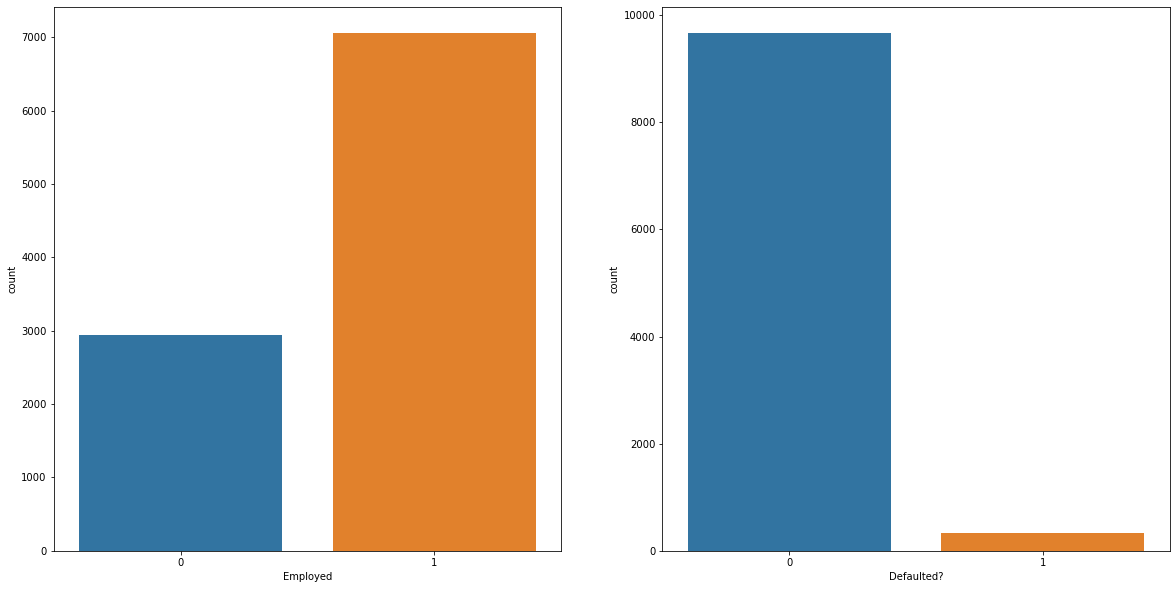

In [11]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='Employed')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='Defaulted?')

In [12]:
print('Total Employed vs. Unemployed: ')
display(data['Employed'].value_counts())

print('\nFraction Employed vs. Unemployed:')
data['Employed'].value_counts(normalize=True)

Total Employed vs. Unemployed: 


1    7056
0    2944
Name: Employed, dtype: int64


Fraction Employed vs. Unemployed:


1    0.7056
0    0.2944
Name: Employed, dtype: float64

In [13]:
print('Total Non-Defaulted vs. Defaulted: ')
display(data['Defaulted?'].value_counts())

print('\nFraction Non-Defaulted vs. Defaulted: ')
data['Defaulted?'].value_counts(normalize=True)

Total Non-Defaulted vs. Defaulted: 


0    9667
1     333
Name: Defaulted?, dtype: int64


Fraction Non-Defaulted vs. Defaulted: 


0    0.9667
1    0.0333
Name: Defaulted?, dtype: float64

Text(0.5, 1.0, 'Reserve Capacity')

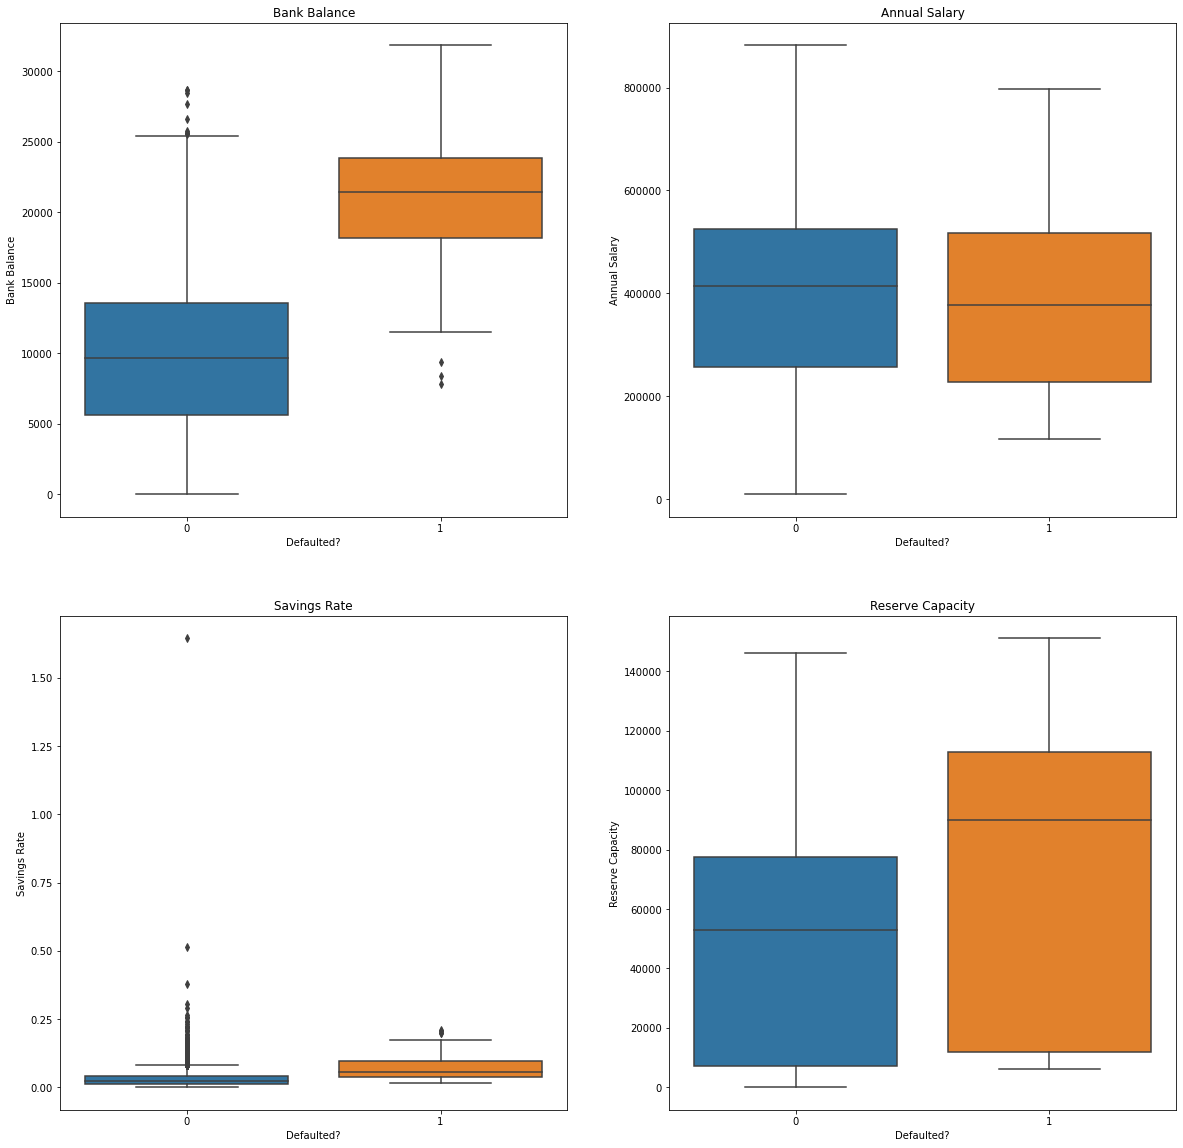

In [14]:
# plt.figure(figsize=(20,10))
# plt.subplot(1,2,1)
# sns.boxplot(data['Defaulted?'], data['Bank Balance'])

# plt.subplot(1,2,2)
# sns.boxplot(data['Defaulted?'], data['Annual Salary'])

fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Bank Balance
sns.boxplot(x=data['Defaulted?'], y=data['Bank Balance'], ax=axs[0, 0])
axs[0, 0].set_title('Bank Balance')

# Annual Salary
sns.boxplot(x=data['Defaulted?'], y=data['Annual Salary'], ax=axs[0, 1])
axs[0, 1].set_title('Annual Salary')

# Savings Rate
sns.boxplot(x=data['Defaulted?'], y=data['Savings Rate'], ax=axs[1, 0])
axs[1, 0].set_title('Savings Rate')

# Reserve Capacity
sns.boxplot(x=data['Defaulted?'], y=data['Reserve Capacity'], ax=axs[1, 1])
axs[1, 1].set_title('Reserve Capacity')

In [15]:
pd.crosstab(data['Employed'], data['Defaulted?'], normalize='index')

Defaulted?,0,1
Employed,,
0,0.956861,0.043139
1,0.970805,0.029195


Text(0.5, 1.0, 'Pearson Correlation of Features')

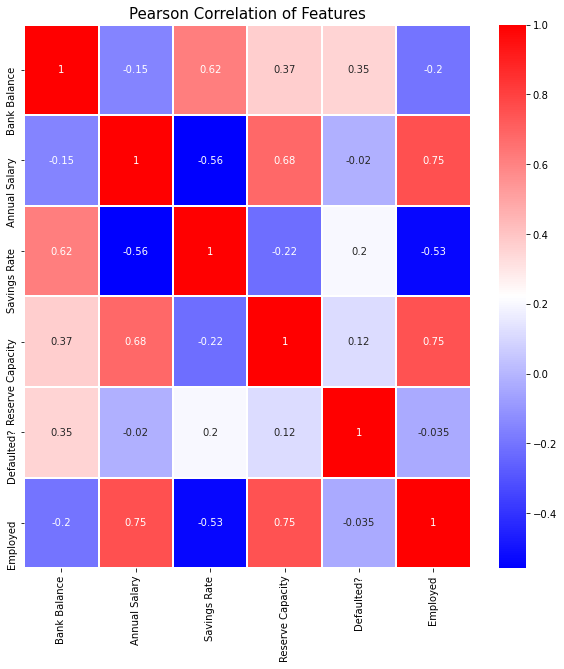

In [16]:
colormap = plt.cm.bwr
plt.figure(figsize=(10, 10))
sns.heatmap(data[['Bank Balance', 'Annual Salary', 'Savings Rate', 'Reserve Capacity', 'Defaulted?',
                  'Employed']].corr(), linewidths=0.1, vmax=1.0, cmap=colormap, linecolor='white', annot=True)
plt.title('Pearson Correlation of Features', size=15)

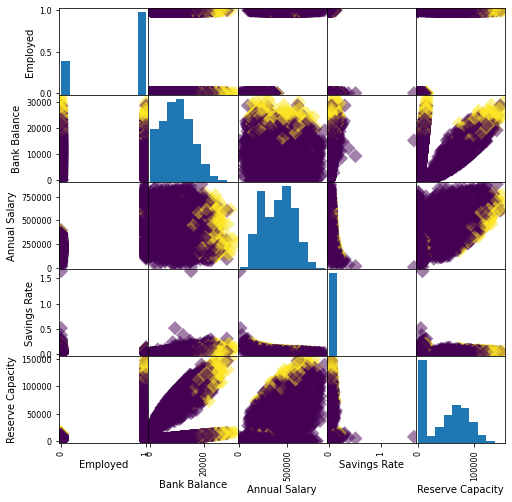

In [17]:
pd.plotting.scatter_matrix(
    data[['Employed', 'Bank Balance', 'Annual Salary',
          'Savings Rate', 'Reserve Capacity']],
    c=data['Defaulted?'], figsize=[8, 8], diagonal='hist', s=100, marker='D', alpha=0.5)
plt.show()

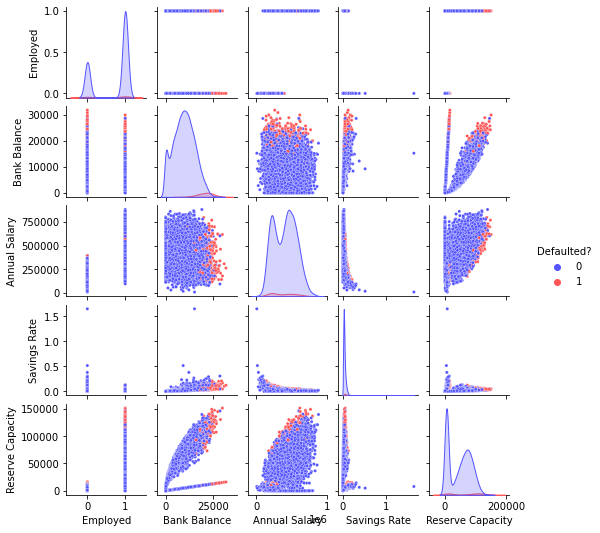

In [18]:
sns.pairplot(data[['Defaulted?', 'Employed', 'Bank Balance', 'Annual Salary', 'Savings Rate', 'Reserve Capacity']],
             hue='Defaulted?', palette='seismic', height=1.5,
             diag_kind='kde', plot_kws=dict(s=10))
# , diag_kws={'bw': 0.25}

### Models

In [19]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

#### Scale and Split data

In [20]:
# split into data and target
X = data[['Employed', 'Bank Balance', 'Annual Salary',
          'Savings Rate', 'Reserve Capacity']].values
y = data['Defaulted?'].values

In [21]:
X_scaled = scale(X)

In [22]:
print('Means before scaling: ', np.mean(X, axis=0))
print('Standard Deviations before scaling: ', np.std(X, axis=0))

Means before scaling:  [7.05600000e-01 1.00244985e+04 4.02203782e+05 3.24142563e-02
 4.82485806e+04]
Standard Deviations before scaling:  [4.55772575e-01 5.80428925e+03 1.60031673e+05 3.37551389e-02
 3.66241779e+04]


In [23]:
print('Means after scaling: ', np.mean(X_scaled, axis=0))
print('Standard Deviations after scaling: ', np.std(X_scaled, axis=0))

Means after scaling:  [-3.17967874e-17 -8.98836561e-17 -1.52411417e-16  1.50635060e-16
 -6.18172180e-17]
Standard Deviations after scaling:  [1. 1. 1. 1. 1.]


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.4, random_state=0)

### Nearest Neighbors Model

In [25]:
from sklearn.neighbors import KNeighborsClassifier

#### K Nearest Neighbors Model
- Based on instance-based or non-generalized learning: it does not attempt to construct a general internal model, but simply stores instances of the training data
- Classification is computed from a single majority vote of the nearest neighbors of every point, and a query point is assinged the data class that has the most representatives with nearest neighbors of the point
- k is an integer value specified by user
- k nearest neighbors is the most commonly used technique, but radius nearest neighbors also exists (can be better for data that is not uniformly sampled, not good for higher dimensional data)
- Optimal value of k is highly data dependent
- In general, larger k suppresses noise but makes boundaries less distinct
- Basic nearest neighbors classification uses uniform weights (simple majority vote), but some it is better to weight neighbors under some circumstances such that nearer neighbors contribute more

In [26]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [27]:
knn.score(X_test, y_test)

0.968

In [28]:
knn.score(X_train, y_train)

0.9748333333333333

##### KNN Model Complexity Analysis
- This is my attempt to determine the optimal k-value that does not overfit or over-generalize

In [29]:
neighbors_range = np.linspace(1, 100, 100).astype(np.int)

In [30]:
test_scores = []
train_scores = []
for n in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    test_score = knn.score(X_test, y_test)
    train_score = knn.score(X_train, y_train)
    test_scores.append(test_score)
    train_scores.append(train_score)

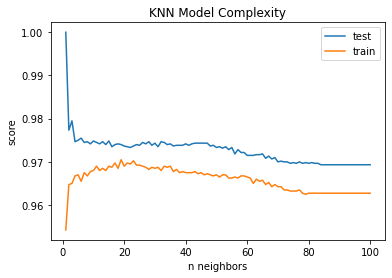

In [31]:
score_list = [neighbors_range, train_scores, test_scores]
scores = pd.DataFrame(score_list).transpose()
scores.columns = ['range', 'test', 'train']
plt.plot(scores['range'], scores['test'], label='test')
plt.plot(scores['range'], scores['train'], label='train')
plt.xlabel('n neighbors')
plt.ylabel('score')
plt.title('KNN Model Complexity')
plt.legend()
plt.show()

In [32]:
knn_score = np.max(scores['train'])

### Linear Classification Models

In [33]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier

#### Logistic Regression Model
- Linear model for classification (not regression)
- Also known as logit regression, maximum-entropy classification (MaxEnt), or the log linear classifier
- The probabilities describing possible outcomes of a single trial are modeled using a logistic function
- In scikit-learn, the implementation can be fit binary, one-vs-rest, or multinomial logistic regression with optional l1 and l2, or elastic-net regularization

In [34]:
lgr = LogisticRegression(random_state=0)
lgr.fit(X_train, y_train)
lgr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
lgr.predict_proba(X_test)

array([[9.99975134e-01, 2.48659613e-05],
       [9.99838524e-01, 1.61475887e-04],
       [9.92208777e-01, 7.79122271e-03],
       ...,
       [9.99071153e-01, 9.28846559e-04],
       [9.97059499e-01, 2.94050063e-03],
       [9.99943249e-01, 5.67507948e-05]])

In [36]:
lgr.decision_function(X_test)

array([-10.60198584,  -8.73099325,  -4.84693574, ...,  -6.98063772,
        -5.8262306 ,  -9.77678414])

In [37]:
lgr_score = lgr.score(X_test, y_test)
print(lgr_score)

0.97225


#### Ridge Classifier Model
- Ridge classifier converts binary targets to {1, -1} and then treats the problem as a regression task
- The Ridge regression extends ordinary least squares regression and addresses some of its problems by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares
- The complexity parameter (alpha >= 0) controls the amount of shrinkage: the larger the value of alpha, the greater the amount of shrinkage, and thus the coefficients become more robust to collinearity
- For ridge classification, the predicted class corresponds to the sign of the regressor's prediction. In multiclass classification, the problem is treated as multi-output regression, and the predicted class corresponds to the highest output value
- Can be significantly faster than logistic regression with a high number of classes because it computes the projection matrix only once
- Sometimes referred to as Least Squares Support Vector Machines with a liner kernel

In [38]:
rcf = RidgeClassifier()
rcf.fit(X_train, y_train)
rcf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
rcf_score = rcf.score(X_test, y_test)
print(rcf_score)

0.96275


#### Stochastic Gradient Descent Classifier Model
- Simple yet efficient approach to linear models
- Particularly useful with large number of samples and features
- Often used in text classification and NLP
- Easily scales to problems with more than 10^5 training examples and 10^5 features
- Requires a number of hyperparameters
- Sensitive to feature scaling
- Classifier implements a plain stochastic gradient descent learning routine, supports different loss functions and penalties

In [40]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd.predict(X_train)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
sgd_score = sgd.score(X_test, y_test)
print(sgd_score)

0.9655


### Support Vector Machines
- Advantages
    - Effective in high dimensional spaces
    - Still effective if number of dimensions > number of samples
    - Uses a subset of training points for decision function (called support vectors), which is memory efficient
    - Versatile: different kernel functions can be specified as the decision function. Custom kernels are possible in scikit-learn  

- Disadvantages
    - If the number of features is much larger than the number of samples, avoiding over-fitting by choosing kernel functions and regularization term is crucial
    - SVMs do not directly provide probability estimates. They are calculated using computationally expensive five fold cross validation

In [42]:
from sklearn.svm import SVC, LinearSVC

#### Support Vector Classifier
- less practical for large datasets (above 10s of thousands of samples)

In [43]:
svc = SVC(random_state=0)
svc.fit(X_train, y_train)
svc.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
svc_score = svc.score(X_test, y_test)
print(svc_score)

0.96675


#### Linear Support Vector Classifier
- faster implementation of SVM
- more flexibility in choice of penalties and loss functions
- scales better to larger datasets

In [45]:
lsvc = LinearSVC(random_state=0, max_iter=10000)
lsvc.fit(X_train, y_train)
lsvc.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
lsvc_score = lsvc.score(X_test, y_test)
print(lsvc_score)

0.96875


### Gaussian Processes
- Advantages
    - Prediction interpolates the observations
    - Prediction is probabalistic (Gaussian): can compute empirical confidence intervals and decide based on those if one should refit
    - Versatile: different kernel functions can be specified as the decision function. Custom kernels are possible in scikit-learn  

- Disadvantages
    - Not sparse: use whole samples/features info for prediction
    - Lose efficiency in high dimensional spaces (greater than a few dozen features)

#### Gaussian Process Classifier
- Implements Gaussian processes for probabalistic classification, where test predictions take the form of probabilities
- Latent function - values not observed and not relevant by themselves. Purpose is to allow convenient formulation of the model, and is integrated out during prediction
- Link function easily approximates integral, squashing latent function, to obtain probablistic classification

In [65]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [66]:
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=0)
gpc.fit(X_train, y_train)
gpc.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
gpc_score = gpc.score(X_test, y_test)
print(gpc_score)

0.97125


### Naive Bayes
- Algorithms based on applying Bayes' theorem with the 'naive' assumption of conditional independence between every pair of features given the value of the class variable
- In spite of apparently over-simplified assumptions, naive Bayes classifiers have worked well in many real-world situations, famously in document and spam filtering
- Require a small amount of training data to estimate necessary parameters
- Extremely fast compared to more sophisticated methods
- Decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution, which helps alleviate problems stemming from the curse of dimensionality
- Known as a descent classifier, but is known to be a bad esimator, so probability outputs are not to be taken too seriously

In [73]:
from sklearn.naive_bayes import GaussianNB

#### Gaussian Naive Bayes Classifier
- The likelihood of features is assumed to be Gaussian

In [70]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
gnb_score = gnb.score(X_test, y_test)
print(gnb_score)

0.94775


### Decision Tree
- Non-parametric supervised learning method used for classification and regression
- The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from data features
- A tree can be seen as a piecewise constant approximation
- The deeper the tree, the more complex the decision rules and the more the model fits  

- Advantages
    - Simple to understand and interpret - trees can be visualized
    - Requires little data prep
    - Cost of using the tree is log in the number of data points used to train the tree
    - Able to handle numerical and categorical data
    - Able to handle multi-output
    - White box model: if a given situation is observable in the model, the explanation of the condition is easily derived by boolean logic. Black box model results may be more difficult to interpret
    - Possible to validate model using statistical tests
    - Performs well even when assumptions are somewhat violated by true model from which the data were generated  

- Disadvantages
    - Can create overcomplex trees that do not generalize the data well (overfitting)
    - Can be unstable: small variations in the data might result in a completely different tree being generated
    - Predictions are neither smooth nor continuous: not good at extrapolation
    - Locally optimal decisions are often made at each node. Therefore the algorithm cannot guarantee the return of a globally optimal decision tree
    - Some concepts are hard to learn because decision trees do not express them easily
    - Can be biased if some classes dominate. Recommended to balance the dataset prior to fitting the decision tree

#### Decision Tree Classifier

In [48]:
from sklearn import tree

In [49]:
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
dtc.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
dtc_score = dtc.score(X_test, y_test)
print(dtc_score)

0.95175


### Non-Default Model
Because the dataset contains such a small percentage of defaults (<4%), I will compare my models to a simple, base-case model that predicts none of the clients will default

In [81]:
no_default_score = 1 - data['Defaulted?'].mean()
print(no_default_score)

0.9667


## Model Comparison

In [95]:
model_scores = pd.DataFrame({
    'Model': ['K-Nearest-Neighbors', 'Logistic Regression', 'Ridge Classifier', 'Stochastic Gradient Descent',
              'Support Vector Classifier', 'Linear Support Vector Classifier', 'Gaussian Process Classifier',
              'Decision Tree Classifier', 'BASE: No Default Model'],
    'Score': [knn_score, lgr_score, rcf_score, sgd_score, svc_score, lsvc_score, gpc_score, dtc_score, no_default_score]})

model_scores.sort_values(by='Score', ascending=False)

,Model,Score
3,Stochastic Gradient Descent,0.97250
1,Logistic Regression,0.97225
6,Gaussian Process Classifier,0.97125
0,K-Nearest-Neighbors,0.97050
5,Linear Support Vector Classifier,0.96875
4,Support Vector Classifier,0.96675
8,BASE: No Default Model,0.96670
2,Ridge Classifier,0.96275
7,Decision Tree Classifier,0.95175


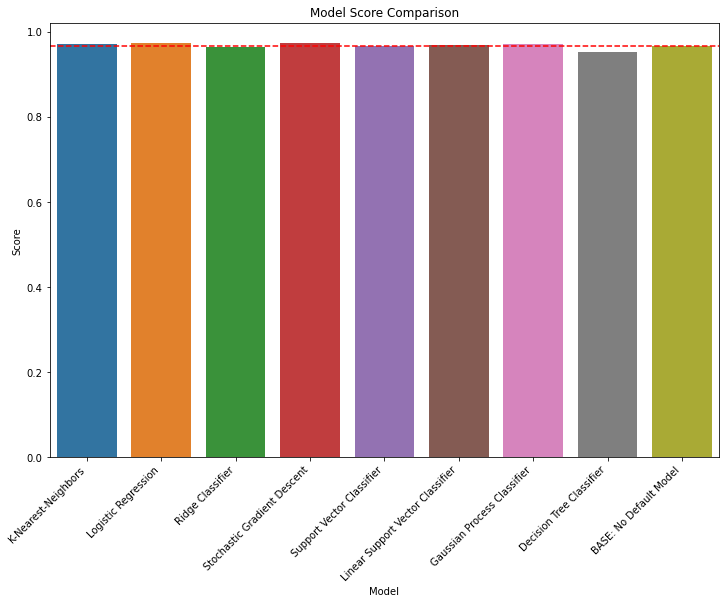

In [96]:
plt.figure(figsize=(12, 8))
chart = sns.barplot(data=model_scores, x='Model', y='Score')
chart.set_xticklabels(chart.get_xticklabels(),
                      rotation=45, horizontalalignment='right')
chart.set_title('Model Score Comparison')
chart.axhline(no_default_score, ls='--', c='r')

Although six of the eight models outperformed the base case of no defaults, they all did so by less than 1%. I will now re-evaluate my EDA to see if I can classifiy a large portion of the clients as low risk for default, and then evaluate the models on only the high risk clients.

## Look Back at EDA

<AxesSubplot:xlabel='Defaulted?', ylabel='count'>

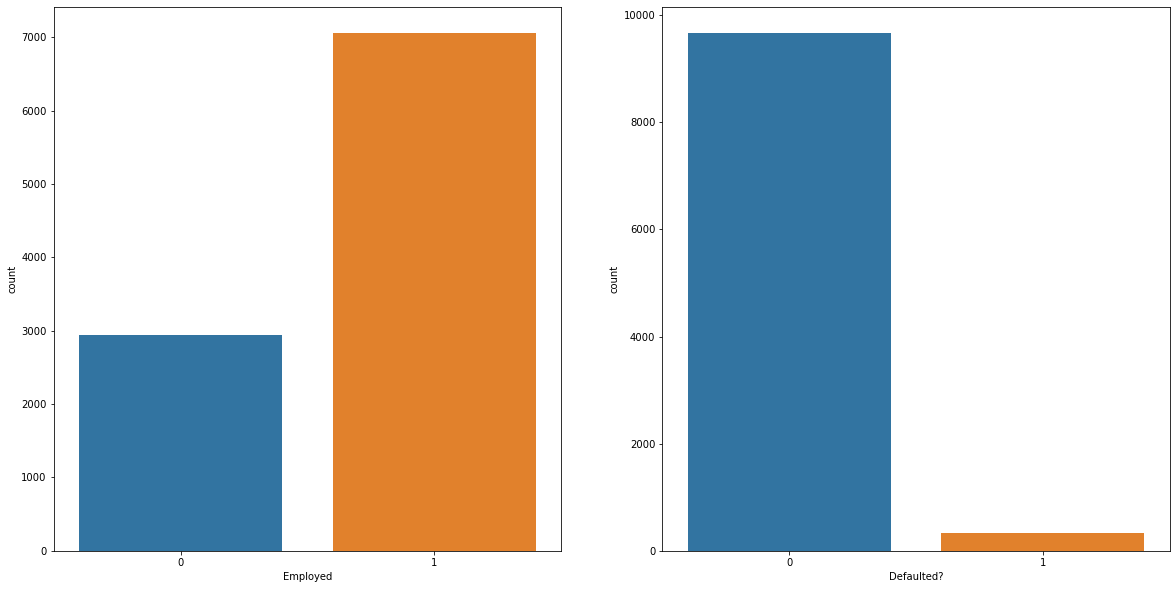

In [97]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='Employed')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='Defaulted?')

Only a small fraction (<4%) of clients defaulted on their loans

Text(0.5, 1.0, 'Reserve Capacity')

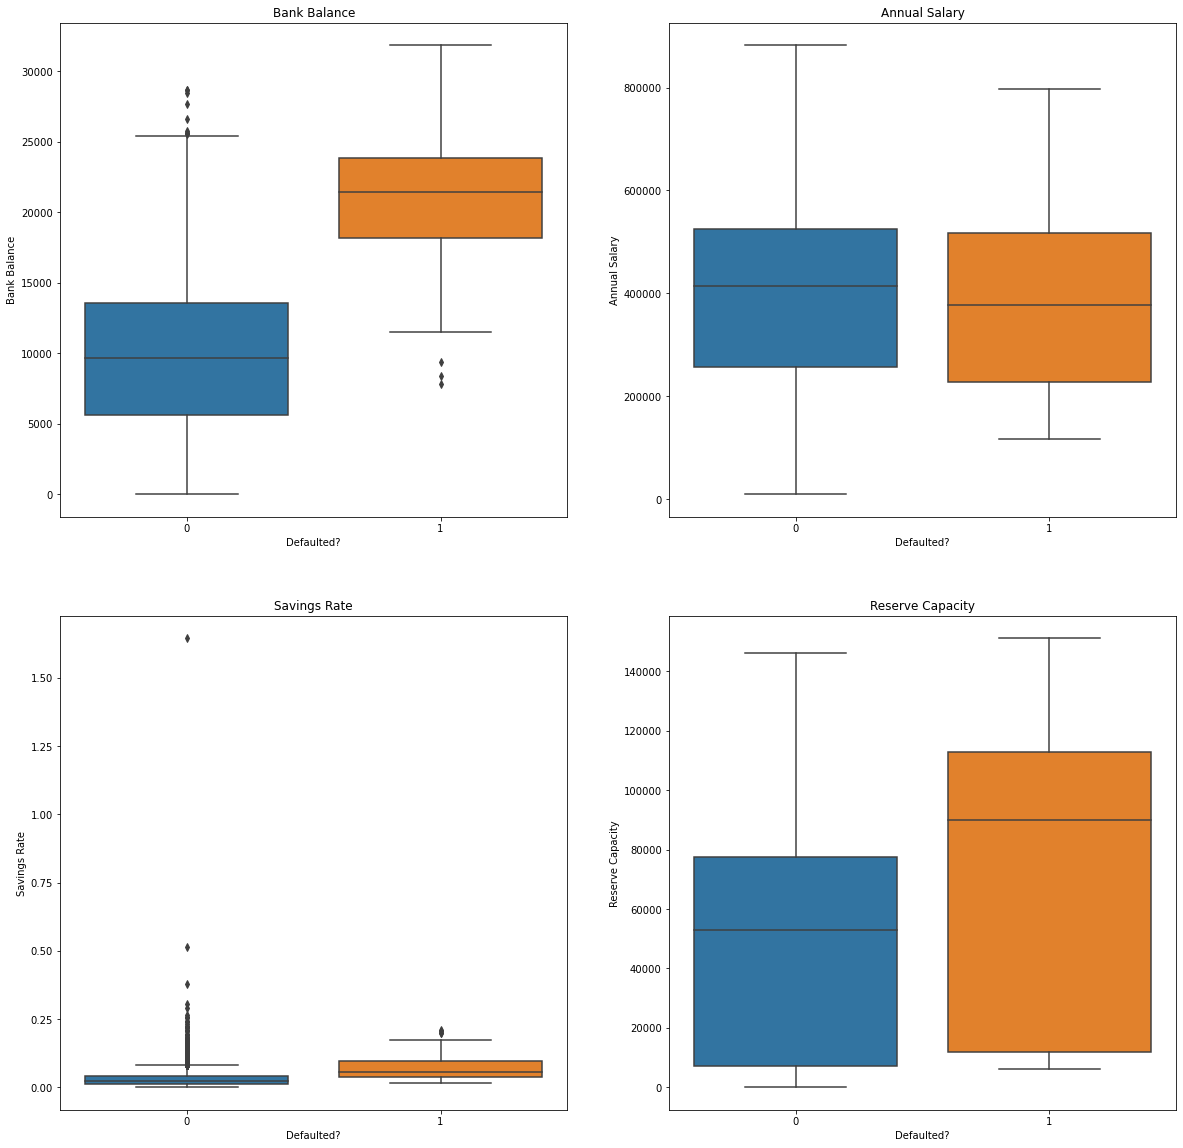

In [13]:
# plt.figure(figsize=(20,10))
# plt.subplot(1,2,1)
# sns.boxplot(data['Defaulted?'], data['Bank Balance'])

# plt.subplot(1,2,2)
# sns.boxplot(data['Defaulted?'], data['Annual Salary'])

fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Bank Balance
sns.boxplot(x=data['Defaulted?'], y=data['Bank Balance'], ax=axs[0, 0])
axs[0, 0].set_title('Bank Balance')

# Annual Salary
sns.boxplot(x=data['Defaulted?'], y=data['Annual Salary'], ax=axs[0, 1])
axs[0, 1].set_title('Annual Salary')

# Savings Rate
sns.boxplot(x=data['Defaulted?'], y=data['Savings Rate'], ax=axs[1, 0])
axs[1, 0].set_title('Savings Rate')

# Reserve Capacity
sns.boxplot(x=data['Defaulted?'], y=data['Reserve Capacity'], ax=axs[1, 1])
axs[1, 1].set_title('Reserve Capacity')

In [98]:
data['Defaulted?'].sum()

333

No overlap exists between the IQR of bank balance between those who defaulted and those who did not. Only three outliers defaulted (out of a total of 333 defaults) when their bank balance was lower than the mean balance of non defaulters. I decided to filter the dataset to include only those customers with a balance higher than the mean value of the non-defaulting customers' account balances.

In [150]:
# calculate mean of bank account balance of non-defaulted
non_defaults = data[data['Defaulted?'] == 0]
mean_bal_non_def = non_defaults['Bank Balance'].mean()
print(mean_bal_non_def)

# filter dataset to only include balances higher than mean_bal_non_def
filtered_data = data[data['Bank Balance'] > mean_bal_non_def].copy()

9647.324961208253


## EDA on Filtered Data

In [151]:
print(filtered_data.head())

   Index  Employed  Bank Balance  Annual Salary  Defaulted?  Savings Rate  \
1      2         0       9806.16      145273.56           0      0.067501   
2      3         1      12882.60      381205.68           0      0.033794   
5      6         0      11035.08       89898.72           0      0.122750   
6      7         1       9906.12      298862.76           0      0.033146   
7      8         0       9704.04      211205.40           0      0.045946   

   Reserve Capacity  
1       4903.080000  
2      76519.258683  
5       5517.540000  
6      59364.183533  
7       4852.020000  


In [152]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5159 entries, 1 to 9998
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Index             5159 non-null   int64  
 1   Employed          5159 non-null   int64  
 2   Bank Balance      5159 non-null   float64
 3   Annual Salary     5159 non-null   float64
 4   Defaulted?        5159 non-null   int64  
 5   Savings Rate      5159 non-null   float64
 6   Reserve Capacity  5159 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 322.4 KB


In [153]:
filtered_data.isnull().sum()

Index               0
Employed            0
Bank Balance        0
Annual Salary       0
Defaulted?          0
Savings Rate        0
Reserve Capacity    0
dtype: int64

In [154]:
filtered_data.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?,Savings Rate,Reserve Capacity
count,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000
mean,5028.625121,0.633456,14584.151014,382505.063586,0.063966,0.048558,58854.534078
std,2897.875464,0.481907,3721.306715,162626.878071,0.244716,0.038068,40949.079531
min,2.000000,0.000000,9647.400000,9263.640000,0.000000,0.011950,4823.760000
25%,2506.500000,0.000000,11612.940000,234294.300000,0.000000,0.026536,8298.030000
50%,5020.000000,1.000000,13835.640000,386998.200000,0.000000,0.038041,75870.804535
75%,7530.500000,1.000000,16720.980000,510743.940000,0.000000,0.061684,91228.806192
max,9999.000000,1.000000,31851.840000,882650.760000,1.000000,1.645025,151134.768282


## Observations about filtered data so far
- The filtered dataset is approximately half the size of the original
- 63% of the customers are employed (slightly lower than original)
- 6% defaulted (roughly twice the portion of the old dataset)

### New feature engineering ideas
- add a 'high risk' feature for high bank account balances
- investigate the correlation between high account balances, unemployed, and defaults to modify high risk feature

In [161]:
filtered_data['High Risk'] = np.where(
    filtered_data['Bank Balance'] > 15000, 1, 0)

In [164]:
filtered_data.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?,Savings Rate,Reserve Capacity,High Risk
count,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000
mean,5028.625121,0.633456,14584.151014,382505.063586,0.063966,0.048558,58854.534078,0.387478
std,2897.875464,0.481907,3721.306715,162626.878071,0.244716,0.038068,40949.079531,0.487222
min,2.000000,0.000000,9647.400000,9263.640000,0.000000,0.011950,4823.760000,0.000000
25%,2506.500000,0.000000,11612.940000,234294.300000,0.000000,0.026536,8298.030000,0.000000
50%,5020.000000,1.000000,13835.640000,386998.200000,0.000000,0.038041,75870.804535,0.000000
75%,7530.500000,1.000000,16720.980000,510743.940000,0.000000,0.061684,91228.806192,1.000000
max,9999.000000,1.000000,31851.840000,882650.760000,1.000000,1.645025,151134.768282,1.000000


Text(0.5, 1.0, 'Reserve Capacity')

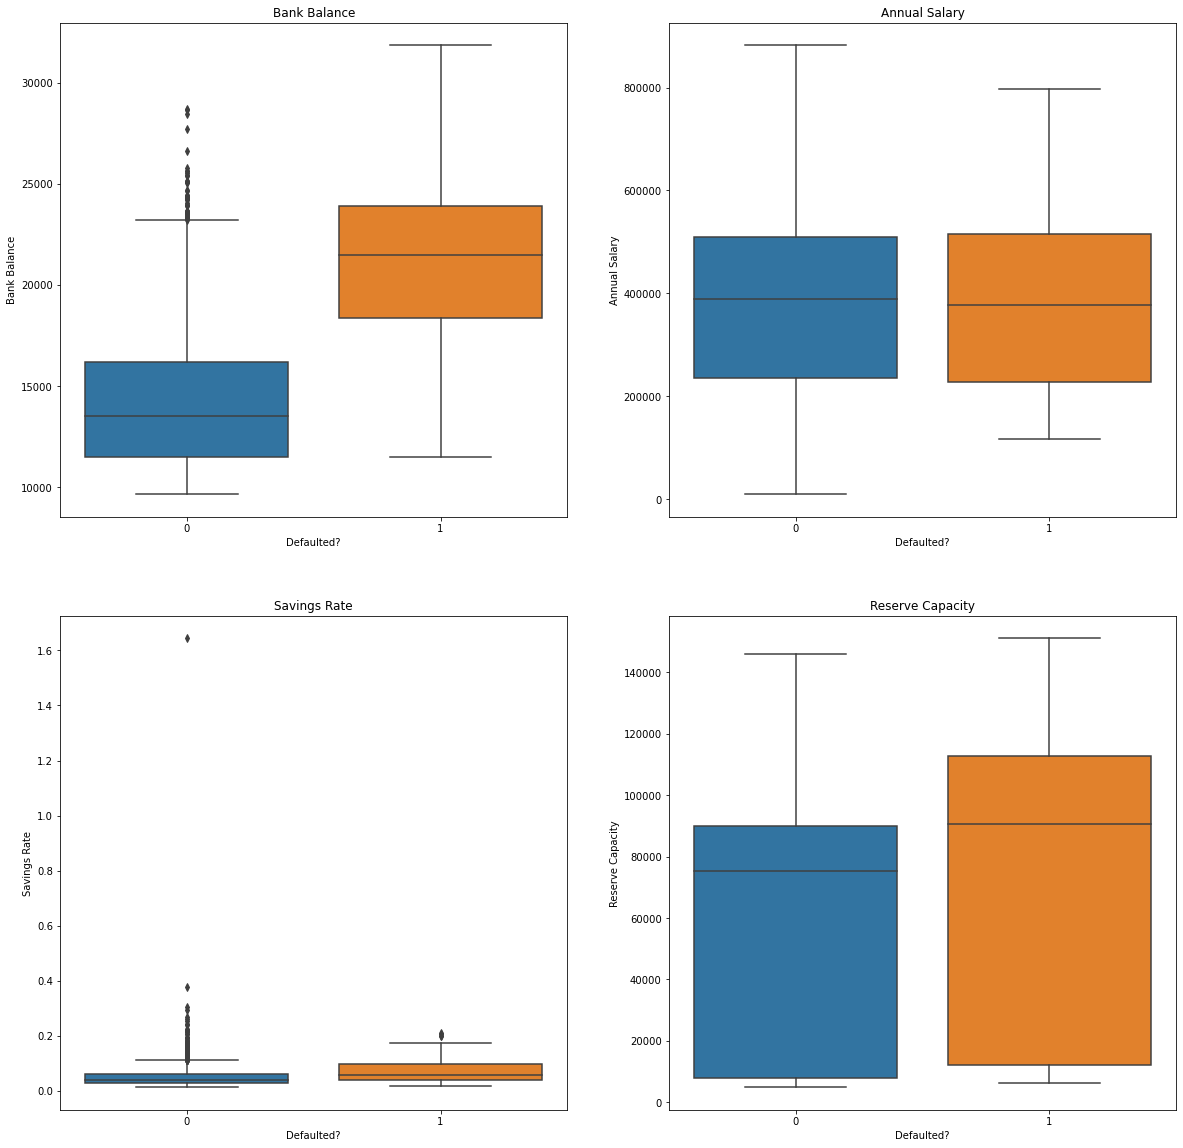

In [162]:
# plt.figure(figsize=(20,10))
# plt.subplot(1,2,1)
# sns.boxplot(data['Defaulted?'], data['Bank Balance'])

# plt.subplot(1,2,2)
# sns.boxplot(data['Defaulted?'], data['Annual Salary'])

fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Bank Balance
sns.boxplot(x=filtered_data['Defaulted?'],
            y=data['Bank Balance'], ax=axs[0, 0])
axs[0, 0].set_title('Bank Balance')

# Annual Salary
sns.boxplot(x=filtered_data['Defaulted?'],
            y=data['Annual Salary'], ax=axs[0, 1])
axs[0, 1].set_title('Annual Salary')

# Savings Rate
sns.boxplot(x=filtered_data['Defaulted?'],
            y=data['Savings Rate'], ax=axs[1, 0])
axs[1, 0].set_title('Savings Rate')

# Reserve Capacity
sns.boxplot(x=filtered_data['Defaulted?'],
            y=data['Reserve Capacity'], ax=axs[1, 1])
axs[1, 1].set_title('Reserve Capacity')

In [163]:
high_risk_customers = filtered_data[filtered_data['High Risk'] == 1].copy()
high_risk_customers.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?,Savings Rate,Reserve Capacity,High Risk
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.0
mean,5049.831416,0.575788,18414.850325,368033.776088,0.153577,0.063953,62385.797987,1.0
std,2882.453842,0.494346,2850.479139,162838.247077,0.360633,0.050220,46784.911495,0.0
min,28.000000,0.000000,15000.600000,9263.640000,0.000000,0.017591,7505.820000,1.0
25%,2533.500000,0.000000,16176.480000,225700.500000,0.000000,0.035807,9370.380000,1.0
50%,5056.000000,1.000000,17661.360000,352499.160000,0.000000,0.051994,86340.410618,1.0
75%,7530.000000,1.000000,19992.360000,501841.200000,0.000000,0.082723,103282.644296,1.0
max,9999.000000,1.000000,31851.840000,882650.760000,1.000000,1.645025,151134.768282,1.0


In [165]:
high_risk_customers['Defaulted?'].sum()

307

Many of the defaults were among high risk customers

<AxesSubplot:title={'center':'High Risk Customers'}, xlabel='Employed', ylabel='count'>

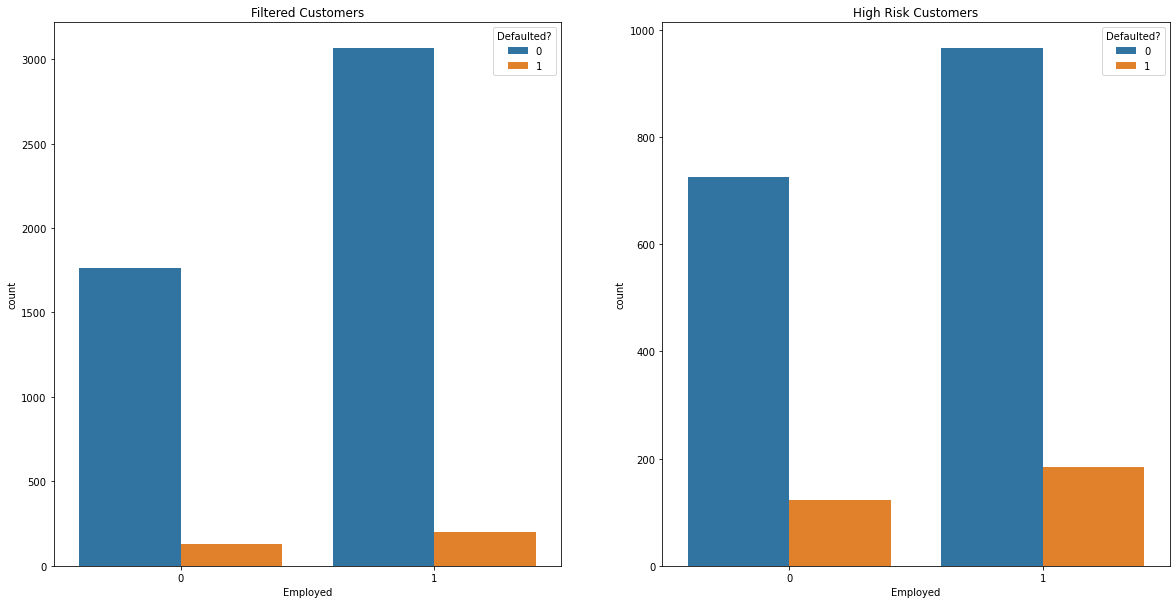

In [170]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].set_title('Filtered Customers')
sns.countplot(data=filtered_data, ax=axs[0], x='Employed', hue='Defaulted?')

axs[1].set_title('High Risk Customers')
sns.countplot(data=high_risk_customers,
              ax=axs[1], x='Employed', hue='Defaulted?')

Text(0.5, 1.0, 'Pearson Correlation of Features')

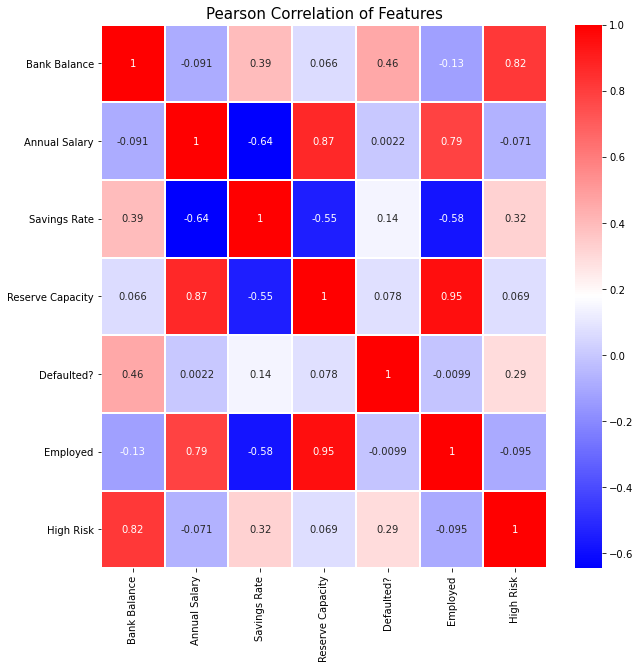

In [173]:
colormap = plt.cm.bwr
plt.figure(figsize=(10, 10))
sns.heatmap(filtered_data[['Bank Balance', 'Annual Salary', 'Savings Rate', 'Reserve Capacity', 'Defaulted?',
                           'Employed', 'High Risk']].corr(), linewidths=0.1, vmax=1.0, cmap=colormap, linecolor='white', annot=True)
plt.title('Pearson Correlation of Features', size=15)

It appears that annual salary, reserve capacity, and employment have almost no effect on defaults, so I will drop those features. High risk is a binary function of bank balance. I will leave it in the dataset for now at the risk of being repetitive because over 92% (307 of 333) of the defaults occurred among high risk customers

In [175]:
filtered_data.drop(['Annual Salary', 'Reserve Capacity', 'Employed'], axis=1)

,Index,Bank Balance,Defaulted?,Savings Rate,High Risk
1,2,9806.16,0,0.067501,0
2,3,12882.60,0,0.033794,0
5,6,11035.08,0,0.122750,0
6,7,9906.12,0,0.033146,0
7,8,9704.04,0,0.045946,0
...,...,...,...,...,...
9989,9990,11991.36,0,0.049931,0
9992,9993,13339.80,0,0.024437,0
9993,9994,11266.08,0,0.016577,0
9997,9998,10144.92,0,0.014418,0


#### Split and Scale Data

In [177]:
# split into data and target
Xf = filtered_data[['Bank Balance', 'Savings Rate', 'High Risk']].values
yf = filtered_data['Defaulted?'].values

In [178]:
Xf_scaled = scale(Xf)

In [179]:
print('Means before scaling: ', np.mean(Xf, axis=0))
print('Standard Deviations before scaling: ', np.std(Xf, axis=0))

Means before scaling:  [1.45841510e+04 4.85582804e-02 3.87478193e-01]
Standard Deviations before scaling:  [3.72094604e+03 3.80640772e-02 4.87174346e-01]


In [180]:
print('Means after scaling: ', np.mean(Xf_scaled, axis=0))
print('Standard Deviations after scaling: ', np.std(Xf_scaled, axis=0))

Means after scaling:  [-5.37142212e-17  3.23662615e-17  2.89230422e-17]
Standard Deviations after scaling:  [1. 1. 1.]


In [181]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(
    Xf_scaled, yf, test_size=0.4, random_state=0)

### Run New Models

In [182]:
# optimized K neighbors from previous models
knn = KNeighborsClassifier(n_neighbors=20)

In [184]:
# iterate through models and determine new scores
model_list = [knn, lgr, rcf, sgd, svc, lsvc, gpc, dtc]
new_scores = []

for model in model_list:
    model.fit(Xf_train, yf_train)
    model.predict(Xf_test)
    new_scores.append(model.score(Xf_test, yf_test))

### Compare New Scores

In [188]:
no_default_score_new = 1 - filtered_data['Defaulted?'].mean()
print(no_default_score_new)

0.9360341151385927


In [199]:
new_scores.append(no_default_score_new)

In [200]:
del new_scores[-1]

In [201]:
new_model_scores = pd.DataFrame({
    'Model': ['K-Nearest-Neighbors', 'Logistic Regression', 'Ridge Classifier', 'Stochastic Gradient Descent',
              'Support Vector Classifier', 'Linear Support Vector Classifier', 'Gaussian Process Classifier',
              'Decision Tree Classifier', 'BASE: No Default Model'],
    'Score': new_scores})

new_model_scores.sort_values(by='Score', ascending=False)

,Model,Score
3,Stochastic Gradient Descent,0.950581
5,Linear Support Vector Classifier,0.950581
4,Support Vector Classifier,0.950097
0,K-Nearest-Neighbors,0.949128
1,Logistic Regression,0.948643
2,Ridge Classifier,0.948643
6,Gaussian Process Classifier,0.948643
8,BASE: No Default Model,0.936034
7,Decision Tree Classifier,0.921512


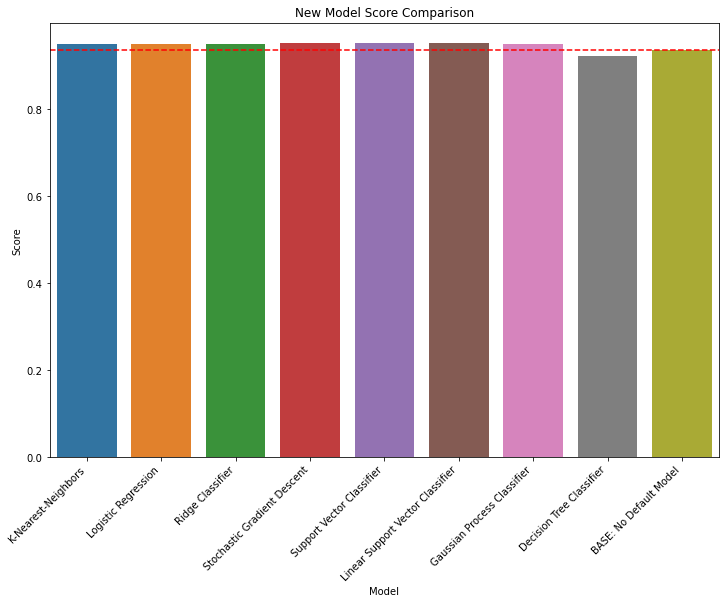

In [203]:
plt.figure(figsize=(12, 8))
chart = sns.barplot(data=new_model_scores, x='Model', y='Score')
chart.set_xticklabels(chart.get_xticklabels(),
                      rotation=45, horizontalalignment='right')
chart.set_title('New Model Score Comparison')
chart.axhline(no_default_score_new, ls='--', c='r')

### Conclusions
- All but one of the models performed better than the base case model on the new filtered data
- The difference in percentage of correct predictions was also higher for the filtered data
- This dataset was difficult because of the extremely low portion of target values in the training data, but I learned a lot about different classification models, implementing them in scikit-learn, feature engineering, and visualizing EDA and results